In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [2]:
import os
os.chdir("..")

In [3]:
from scripts.run_generalization_error_experiments import config
from distribution import create_random_distribution, Distribution
from utils import cross_entropy

In [4]:
results_path = Path("results") / "generalization_error_results.pkl"
results = pickle.load(open(results_path, "rb"))

In [5]:
# A generic function for varying one parameter and viewing how the generalization error changes
def vary_one(key, params, vary=None):
    values = []
    losses = []
    for value in (vary or config[key]):
        params[key] = value
        if str(params) in results:
            distribution = create_random_distribution(
                params["m"],
                params["low_a"],
                params["high_a"],
                params["d"],
                params["epsilon"],
                seed=123,
            )
            unavoidable_loss = distribution.self_entropy()
            values.append(value)
            losses.append(np.mean(results[str(params)]) - unavoidable_loss)
    return values, losses

In [6]:
params = {
    "m": 10,
    "low_a": .55,
    "high_a": .75,
    "d": None,
    "epsilon": .1,
    "n": None,
    "mode": None,
}

In [7]:
MISSPECIFIED_D = 5

distribution = create_random_distribution(
    params["m"],
    params["low_a"],
    params["high_a"],
    MISSPECIFIED_D,
    params["epsilon"],
    seed=123,
)

# The excess generalization error of the optimal misspecified distribution
optimal_distribution = Distribution(distribution.accuracies, {})
B_I = distribution.expectation(lambda L, Y: cross_entropy(optimal_distribution.positive_probs(L), Y)) - \
    distribution.expectation(lambda L, Y: cross_entropy(distribution.positive_probs(L), Y))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


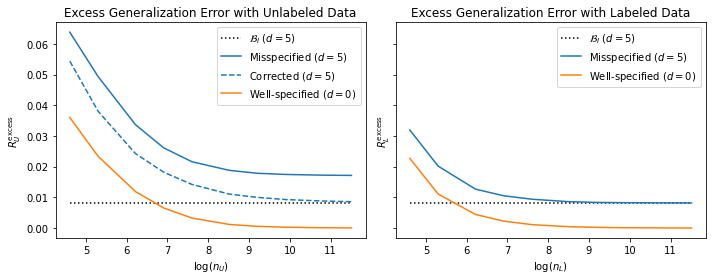

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

params.update({"d": 0, "mode": "mean"})
values, wellspecified_losses = vary_one("n", params)
params.update({"d": 5, "mode": "mean"})
_, misspecified_losses = vary_one("n", params)
params.update({"d": 5, "mode": "median"})
_, corrected_losses = vary_one("n", params)

axs[0].plot(np.log(values), [B_I] * len(values), label=r"$\mathcal{B}_I$ ($d=5$)", ls="dotted", color="black")
axs[0].plot(np.log(values), misspecified_losses, label=r"Misspecified ($d=5$)", ls="solid", color="tab:blue")
axs[0].plot(np.log(values), corrected_losses, label=r"Corrected ($d=5$)", ls="dashed", color="tab:blue")
axs[0].plot(np.log(values), wellspecified_losses, label=r"Well-specified ($d=0$)", ls="solid", color="tab:orange")

axs[0].legend()
axs[0].set_title("Excess Generalization Error with Unlabeled Data")
axs[0].set(xlabel=r"$\log(n_U)$", ylabel=r"$R_U^{\mathrm{excess}}$")

params.update({"d": 0, "mode": "labeled"})
values, wellspecified_losses = vary_one("n", params)
params.update({"d": 5, "mode": "labeled"})
_, misspecified_losses = vary_one("n", params)

axs[1].plot(np.log(values), [B_I] * len(values), label=r"$\mathcal{B}_I$ ($d=5$)", ls="dotted", color="black")
axs[1].plot(np.log(values), misspecified_losses, label=r"Misspecified ($d=5$)", ls="solid", color="tab:blue")
axs[1].plot(np.log(values), wellspecified_losses, label=r"Well-specified ($d=0$)", ls="solid", color="tab:orange")

axs[1].legend()
axs[1].set_title("Excess Generalization Error with Labeled Data")
axs[1].set(xlabel=r"$\log(n_L)$", ylabel=r"$R_L^{\mathrm{excess}}$")

fig.tight_layout()
plt.savefig("figures/generalization_error.eps", format="eps")
plt.show()